In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data          
from skimage import io            
from skimage import color        
from skimage import filters       
from skimage.util import img_as_float, img_as_ubyte

In [ ]:
benchmark_image_name = 'camera'
sobel_sharpen_amount = 0.4
unsharp_radius = 1.5
unsharp_amount = 1.5 

In [3]:
try:
    original_image = getattr(data, benchmark_image_name)()
    print(f"Loaded benchmark image: '{benchmark_image_name}'")
except AttributeError:
    print(f"Error: Benchmark image '{benchmark_image_name}' not found in skimage.data.")

    original_image = data.camera()
    benchmark_image_name = 'camera'

Loaded benchmark image: 'camera'


In [4]:
image_float = img_as_float(original_image)

if image_float.ndim == 3:
    gray_image_float = color.rgb2gray(image_float)
    print("Converted color image to grayscale.")
else:
    gray_image_float = image_float

In [ ]:
gradient_magnitude = filters.sobel(gray_image_float)
sharpened_sobel = gray_image_float + sobel_sharpen_amount * gradient_magnitude
sharpened_sobel = np.clip(sharpened_sobel, 0.0, 1.0)


In [6]:
sharpened_unsharp = filters.unsharp_mask(
    gray_image_float,
    radius=unsharp_radius,
    amount=unsharp_amount,
    channel_axis=None 
)
sharpened_unsharp = np.clip(sharpened_unsharp, 0.0, 1.0)

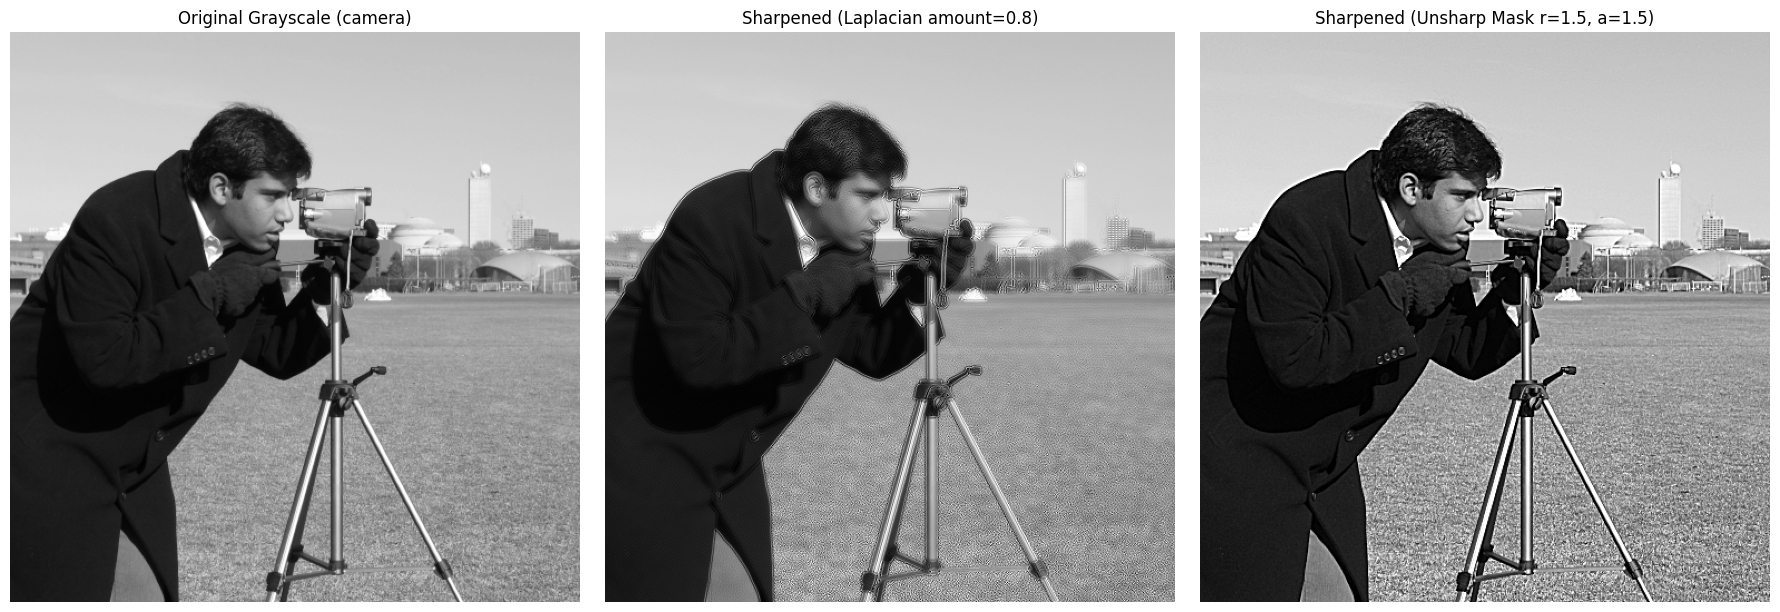

In [ ]:
gray_image_ubyte = img_as_ubyte(gray_image_float)
sharpened_sobel_ubyte = img_as_ubyte(sharpened_sobel)
sharpened_unsharp_ubyte = img_as_ubyte(sharpened_unsharp)

plt.figure(figsize=(18, 6)) 

plt.subplot(1, 3, 1) 
plt.imshow(gray_image_ubyte, cmap='gray')
plt.title(f'Original Grayscale ({benchmark_image_name})')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_sobel_ubyte, cmap='gray')
plt.title(f'Sharpened (Sobel amount={sobel_sharpen_amount})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_unsharp_ubyte, cmap='gray')
plt.title(f'Sharpened (Unsharp Mask r={unsharp_radius}, a={unsharp_amount})')
plt.axis('off')

plt.tight_layout() 
plt.show()